首先导入pytorch包

In [1]:
import torch

In [2]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [3]:
x.shape

torch.Size([12])

In [4]:
X = x.reshape(3, 4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

使用全0、全1、其他常量，或者从特定分布中随机采样的数字来初始化矩阵。我们可以创建一个形状为（2,3,4）的张量，其中所有元素都设置为0。代码如下

In [6]:
torch.zeros((2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [7]:
torch.ones((2,3,4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [8]:
torch.randn(3,4)

tensor([[ 1.8966, -0.0399,  0.3921,  1.6889],
        [-1.7126,  0.1158,  0.0112, -0.0525],
        [ 1.5694, -2.1994, -1.5549, -1.2635]])

In [9]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

In [10]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y # **运算符是求幂运算

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [11]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [12]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [13]:
X==Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [15]:
Y.sum()

tensor(30.)

In [16]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [17]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [18]:
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [19]:
X[0:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

In [20]:
before = id(Y)
Y = Y + X
id(Y) == before

False

In [21]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 140349153836944
id(Z): 140349153836944


In [22]:
before = id(X)
X += Y
id(X) == before

True

In [23]:
A = X.numpy()
B = torch.tensor(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [24]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

In [28]:
import os
os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n') # 列名
    f.write('NA,Pave,127500\n') # 每行表示一个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [30]:
# 如果没有安装pandas，只需取消对以下行的注释来安装pandas
# !pip install pandas
import pandas as pd
data_file = os.path.join('..', 'data', 'house_tiny.csv')
data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [32]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


In [33]:
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


In [34]:
import torch
X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(outputs.to_numpy(dtype=float))
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

标量

In [35]:
import torch
x = torch.tensor(3.0)
y = torch.tensor(2.0)
x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

向量

In [36]:
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

In [37]:
len(x)

4

In [38]:
x.shape

torch.Size([4])

In [39]:
A = torch.arange(20).reshape(5, 4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [40]:
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

In [41]:
B = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
B

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])

In [42]:
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [43]:
X = torch.arange(24).reshape(2, 3, 4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [44]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone() # 通过分配新内存，将A的一个副本分配给B
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [45]:
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [46]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

In [47]:
x = torch.arange(4, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

In [48]:
A.shape, A.sum()

(torch.Size([5, 4]), tensor(190.))

In [49]:
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape

(tensor([40., 45., 50., 55.]), torch.Size([4]))

In [50]:
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape

(tensor([ 6., 22., 38., 54., 70.]), torch.Size([5]))

In [51]:
A.mean(), A.sum() / A.numel()

(tensor(9.5000), tensor(9.5000))

In [52]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

In [64]:
A.mean(axis=1),A.sum(axis=1) / A.shape[1]

(tensor([ 1.5000,  5.5000,  9.5000, 13.5000, 17.5000]),
 tensor([ 1.5000,  5.5000,  9.5000, 13.5000, 17.5000]))

In [56]:
A.shape

torch.Size([5, 4])

In [65]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

In [66]:
A / sum_A

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

In [68]:
print(A)
A.cumsum(axis=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])


tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

点积

In [69]:
y = torch.ones(4, dtype = torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [70]:
print(x)

tensor([0., 1., 2., 3.])


In [73]:
torch.sum(x * y)

tensor(6.)

矩阵-向量积

In [75]:
print(A)
print(x)
A.shape, x.shape, torch.mv(A, x)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])
tensor([0., 1., 2., 3.])


(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

In [77]:
print(A)
print(B)

B = torch.ones(4, 3)
torch.mm(A, B)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

In [78]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

#### 微积分

In [80]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l
def f(x):
    return 3 * x ** 2 - 4 * x

In [81]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h
h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [83]:
def use_svg_display(): #@save
    """使用svg格式在Jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')
# 我们定义set_figsize函数来设置图表大小。注意，这里可以直接使用d2l.plt，因为导入语句 from matplotlibimport pyplot as plt已标记为保存到d2l包中。
def set_figsize(figsize=(3.5, 2.5)): #@save
    """设置matplotlib的图表大小"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize
# 下面的set_axes函数用于设置由matplotlib生成图表的轴的属性。
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
        axes.grid()
# 通过这三个用于图形配置的函数，定义一个plot函数来简洁地绘制多条曲线，因为我们需要在整个书中可视化许多曲线。
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
    ylim=None, xscale='linear', yscale='linear',
    fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []
    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()
    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))
    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

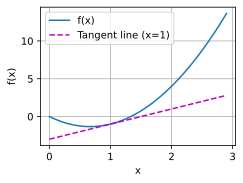

In [84]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

In [97]:
# 作业1：绘制函数y = f(x) = x**3 − 1/x和其在x = 1处切线的图像。
def f(x):
    return x**3 - 1/x
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h
h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=4.21909
h=0.01000, numerical limit=4.02020
h=0.00100, numerical limit=4.00200
h=0.00010, numerical limit=4.00020
h=0.00001, numerical limit=4.00002


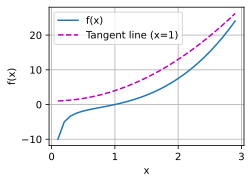

In [98]:
x = np.arange(0.1, 3, 0.1)
plot(x, [f(x), 3*x**2 + 1], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

In [99]:
import torch
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [101]:
x.requires_grad_(True) # 等价于x=torch.arange(4.0,requires_grad=True)
x.grad # 默认值是None

In [102]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [103]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [104]:
x.grad == 4 * x

tensor([True, True, True, True])

In [105]:
# 在默认情况下，PyTorch会累积梯度，我们需要清除之前的值
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [106]:
x.sum()

tensor(6., grad_fn=<SumBackward0>)

In [108]:
x.grad == x**0

tensor([True, True, True, True])

In [109]:
x.grad.zero_()
y = x * x
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [110]:
x = torch.tensor([0, 1.0, 2.0, 3.0], requires_grad=True)
y = x * 2  # y = [0, 2, 4, 6]

# 模拟一个上游梯度，比如 loss 对 y 的梯度
grad_output = torch.tensor([1.0, 1.0, 1.0, 1.0])  # 可以看作 ∂L/∂y
y.backward(gradient=grad_output)

print(x.grad)  # 输出 [2, 2, 2, 2]，因为 ∂L/∂x = ∂L/∂y * dy/dx = [1,1,1] * 2

tensor([2., 2., 2., 2.])


In [235]:
x.grad.zero_()
y = x * x
u = y.detach()

z = u * x
z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [236]:
def f(a):
    b = a * 2
    while b.norm() < 1000: # L2范式小于1000
        b = b * 2
        print(b)
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
        return c

In [237]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()
a.grad == d / a

tensor(-4.9827, grad_fn=<MulBackward0>)
tensor(-9.9654, grad_fn=<MulBackward0>)
tensor(-19.9307, grad_fn=<MulBackward0>)
tensor(-39.8614, grad_fn=<MulBackward0>)
tensor(-79.7229, grad_fn=<MulBackward0>)
tensor(-159.4458, grad_fn=<MulBackward0>)
tensor(-318.8916, grad_fn=<MulBackward0>)
tensor(-637.7831, grad_fn=<MulBackward0>)
tensor(-1275.5663, grad_fn=<MulBackward0>)


tensor(True)

#### 概率

In [238]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [239]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 1., 0., 0., 0., 0.])

In [241]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([0., 1., 3., 2., 2., 2.])

In [242]:
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000 # 相对频率作为估计值

tensor([0.1660, 0.1810, 0.1750, 0.1510, 0.1610, 0.1660])

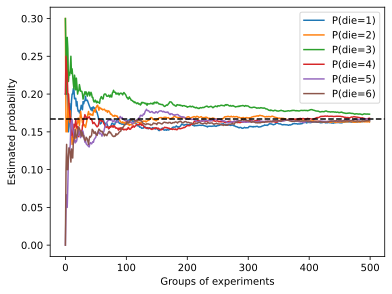

In [250]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(), label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

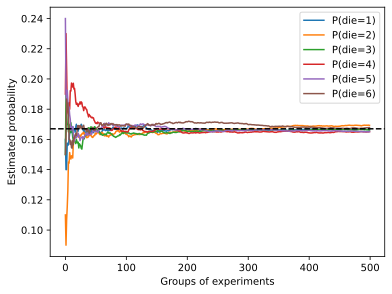

In [251]:
counts = multinomial.Multinomial(100, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(), label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();